In [27]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# input file names
vocabFileName = 'hw4_vocab.txt'
unigramFileName = 'hw4_unigram.txt'
bigramFileName = 'hw4_bigram.txt'

In [3]:
# Read the inputs

vocabs = []
counts = []
vocabFile = open(vocabFileName, 'r')
countFile = open(unigramFileName, 'r')

for line in vocabFile:
    vocabs.append(line.strip())

for line in countFile:
    counts.append(int(line.strip()))

In [4]:
# 4.3a
totalNumCounts = sum(counts)
PuProb = [d/totalNumCounts for d in counts]
for i in range(len(vocabs)):
    if(vocabs[i].startswith('M')):
        print("Word(w): %s, Pu(w): %f" % (vocabs[i], PuProb[i]))

Word(w): MILLION, Pu(w): 0.002073
Word(w): MORE, Pu(w): 0.001709
Word(w): MR., Pu(w): 0.001442
Word(w): MOST, Pu(w): 0.000788
Word(w): MARKET, Pu(w): 0.000780
Word(w): MAY, Pu(w): 0.000730
Word(w): M., Pu(w): 0.000703
Word(w): MANY, Pu(w): 0.000697
Word(w): MADE, Pu(w): 0.000560
Word(w): MUCH, Pu(w): 0.000515
Word(w): MAKE, Pu(w): 0.000514
Word(w): MONTH, Pu(w): 0.000445
Word(w): MONEY, Pu(w): 0.000437
Word(w): MONTHS, Pu(w): 0.000406
Word(w): MY, Pu(w): 0.000400
Word(w): MONDAY, Pu(w): 0.000382
Word(w): MAJOR, Pu(w): 0.000371
Word(w): MILITARY, Pu(w): 0.000352
Word(w): MEMBERS, Pu(w): 0.000336
Word(w): MIGHT, Pu(w): 0.000274
Word(w): MEETING, Pu(w): 0.000266
Word(w): MUST, Pu(w): 0.000267
Word(w): ME, Pu(w): 0.000264
Word(w): MARCH, Pu(w): 0.000260
Word(w): MAN, Pu(w): 0.000253
Word(w): MS., Pu(w): 0.000239
Word(w): MINISTER, Pu(w): 0.000240
Word(w): MAKING, Pu(w): 0.000212
Word(w): MOVE, Pu(w): 0.000210
Word(w): MILES, Pu(w): 0.000206


In [5]:
# Read the bigram inputs
bigramCounts = [dict() for d in vocabs]

bigramFile = open(bigramFileName, 'r')
for line in bigramFile:
    w1Idx, w2Idx, count = line.strip().split('\t')
    w1Idx = int(w1Idx)
    w2Idx = int(w2Idx)
    count = int(count)
    bigramCounts[w1Idx-1][w2Idx-1] = count

In [12]:
# 4.3b
def bigramProb(givenWordIdx, followedWordIdx):
    if counts[givenWordIdx] > 0:
        if followedWordIdx in bigramCounts[givenWordIdx]:
            return bigramCounts[givenWordIdx][followedWordIdx] / counts[givenWordIdx]
        else:
            return 0
    else:
        return 0

givenWordIdx = vocabs.index("THE")
PbProb = {}
    
for followedWordIdx in bigramCounts[givenWordIdx]:
    PbProb[followedWordIdx] = bigramProb(givenWordIdx, followedWordIdx)
    
PbProb.items()
sortedPbProb = sorted((value, key) for (key,value) in PbProb.items())
sortedPbProb.reverse()
for tuple in sortedPbProb[:10]:
    print("Next Word(w): %s, Pb(w|THE): %f" % (vocabs[tuple[1]], tuple[0]))

Next Word(w): <UNK>, Pb(w|THE): 0.615020
Next Word(w): U., Pb(w|THE): 0.013372
Next Word(w): FIRST, Pb(w|THE): 0.011720
Next Word(w): COMPANY, Pb(w|THE): 0.011659
Next Word(w): NEW, Pb(w|THE): 0.009451
Next Word(w): UNITED, Pb(w|THE): 0.008672
Next Word(w): GOVERNMENT, Pb(w|THE): 0.006803
Next Word(w): NINETEEN, Pb(w|THE): 0.006651
Next Word(w): SAME, Pb(w|THE): 0.006287
Next Word(w): TWO, Pb(w|THE): 0.006161


In [13]:
# 4.3c
sentencePu = ['THE','STOCK','MARKET','FELL','BY','ONE','HUNDRED','POINTS','LAST','WEEK']
sentencePb = ['<s>','THE','STOCK','MARKET','FELL','BY','ONE','HUNDRED','POINTS','LAST','WEEK']

# Unigram model
sentencePuProb = []
for word in sentencePu:
    wordIdx = vocabs.index(word)
    sentencePuProb.append(counts[wordIdx]/totalNumCounts)

logLikelihoodPu = np.log(np.prod(np.asarray(sentencePuProb)))
print("Lu = %f" % logLikelihoodPu)

# Bigram model
sentencePbProb = []
for i in range(1,len(sentencePb)):
    givenWordIdx = vocabs.index(sentencePb[i-1])
    followedWordIdx = vocabs.index(sentencePb[i])
    sentencePbProb.append(bigramProb(givenWordIdx, followedWordIdx))

logLikelihoodPb = np.log(np.prod(np.asarray(sentencePbProb)))
print("Lb = %f" % logLikelihoodPb)

Lu = -64.509440
Lb = -40.918132


In [18]:
# 4.3d
sentencePuQd = ['THE','SIXTEEN','OFFICIALS','SOLD','FIRE','INSURANCE']
sentencePbQd = ['<s>','THE','SIXTEEN','OFFICIALS','SOLD','FIRE','INSURANCE']

# Unigram model
sentencePuQdProb = []
for word in sentencePuQd:
    wordIdx = vocabs.index(word)
    sentencePuQdProb.append(counts[wordIdx]/totalNumCounts)

logLikelihoodPuQd = np.log(np.prod(np.asarray(sentencePuQdProb)))
print("Lu = %f" % logLikelihoodPuQd)

# Bigram model
sentencePbQdProb = []
for i in range(1,len(sentencePbQd)):
    givenWordIdx = vocabs.index(sentencePbQd[i-1])
    followedWordIdx = vocabs.index(sentencePbQd[i])
    sentencePbQdProb.append(bigramProb(givenWordIdx, followedWordIdx))
    print("Pb(%s|%s) = %f" % (vocabs[followedWordIdx], vocabs[givenWordIdx], sentencePbQdProb[-1]))

logLikelihoodPbQd = np.log(np.prod(np.asarray(sentencePbQdProb)))
print("Lb = %f" % logLikelihoodPbQd)

Lu = -44.291934
Pb(THE|<s>) = 0.158653
Pb(SIXTEEN|THE) = 0.000229
Pb(OFFICIALS|SIXTEEN) = 0.000000
Pb(SOLD|OFFICIALS) = 0.000092
Pb(FIRE|SOLD) = 0.000000
Pb(INSURANCE|FIRE) = 0.003052
Lb = -inf


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


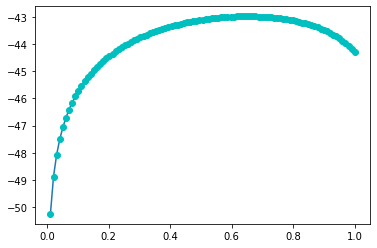

Optimal value of lambda = 0.65, where Lm = -42.964150


In [40]:
# 4.3e
def logPm(lambdaVal):
    PmList = []
    for i in range(len(sentencePuQdProb)):
        Pm = lambdaVal*sentencePuQdProb[i] + (1-lambdaVal)*sentencePbQdProb[i]
        PmList.append(Pm)
    return(np.log(np.prod(np.asarray(PmList))))

lambdaVals = np.linspace(0,1,100)
vfunc = np.vectorize(logPm)
y = vfunc(lambdaVals)

# Plotting
plt.plot(lambdaVals,y)
plt.plot(lambdaVals,y,'co') # same function with cyan dots
plt.show()

# Optimal lambda
print('Optimal value of lambda = %.2f, where Lm = %f' % (lambdaVals[y.argmax()], y.max()))